# Hearts Diseases Prediction

The following research done using heart disease [dataset](https://www.kaggle.com/ronitf/heart-disease-uci) collected from kaggle

In [1]:
#importing all the neccesary libraries
import pandas as pd #importing pandas for data manipulation and visualization
import matplotlib.pyplot as plt #importing matplotlib for visulaization
import numpy as np #numpy for high speed computing
import seaborn as sns #seaborn for Exploratory data analysis

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
# import xgboost as xgb
%matplotlib inline 


In [2]:
#importing the dataset
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.head() #getting the five top variables in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.tail() #getting the last five variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Data Preprocessing

In [5]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


Indepent Variables are: age, sex, chest pain(cp), resting blood pressure(trestbps), serum cholestoral(chol), fasting blood sugar(fbc), resting electrocardiographic(restecg), maximum heart rate(thalach), exercise induced angina(exang), ST depression induced by exercise relative to rest(oldpeak), slope of the peak exercise ST segment(slope), number of major vessels (0-3) colored by flourosopy(ca) & thal: 3 = normal; 6 = fixed defect; 7 = reversable defect(thal)

Dependent Variable is Target

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
def plot_cnf_matrix(matrix, name):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ({})'.format(name), y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [10]:
def cnf_evaluation(y_test_, y_pred_):
    print("Accuracy:", metrics.accuracy_score(y_test_, y_pred_))
    print("Precision:", metrics.precision_score(y_test_, y_pred_))
    print("Recall:", metrics.recall_score(y_test_, y_pred_))

In [11]:
def plot_roc_curve(pipe_, x_test_, y_test_, dec_func = False):
    if dec_func:
        y_dec_func = pipe_.decision_function(x_test_)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test_,  y_dec_func)
        auc = metrics.roc_auc_score(y_test, y_dec_func)
        plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
        plt.legend(loc=4)
        plt.show()
    else:    
        y_pred_proba = pipe_.predict_proba(x_test_)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test_,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
        plt.legend(loc=4)
        plt.show()

In [12]:
#splitting the data into training and test parts
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 7,test_size = 0.2)

## Random Forrest

In [13]:
#scaling
scaler = MinMaxScaler()
sc_x = scaler.fit(x_train)
x_train_scaled = sc_x.transform(x_train.values)
x_test_scaled = sc_x.transform(x_test.values)

#### RandomForestClassifier -> Postprocessing

In [14]:
rclassifier1 = RandomForestClassifier()
rclassifier2 = RandomForestClassifier()
rclassifier1.fit(x_train, y_train)
y_preds_rfc = rclassifier1.predict(x_test)

rclassifier2.fit(x_train_scaled, y_train)
y_preds_rfc_scaled = rclassifier1.predict(x_test_scaled)

print('The accuracy score for Random Forest Unscaled is', accuracy_score(y_test, y_preds_rfc))
print('The accuracy score for Random Forest scaled is', accuracy_score(y_test, y_preds_rfc_scaled))

The accuracy score for Random Forest Unscaled is 0.7377049180327869
The accuracy score for Random Forest scaled is 0.6557377049180327


#### RandomForestClassifier -> confusion Matrix

In [15]:
# unscaled
cnf_matrix_rfc = metrics.confusion_matrix(y_test, y_preds_rfc)
cnf_matrix_rfc

array([[18, 12],
       [ 4, 27]], dtype=int64)

In [16]:
cnf_evaluation(y_test, y_preds_rfc)

Accuracy: 0.7377049180327869
Precision: 0.6923076923076923
Recall: 0.8709677419354839


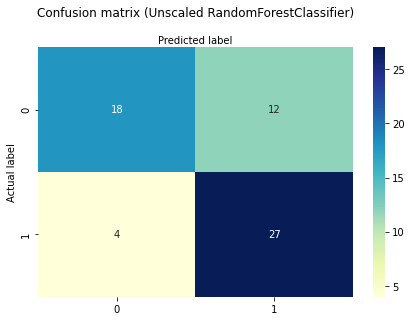

In [17]:
plot_cnf_matrix(cnf_matrix_rfc, 'Unscaled RandomForestClassifier')

#### Interpretation of the map

- 1 x 1: True positives = 26
- 1 x 0: False Negative = 18
- 0 x 1: False Positve = 5
- 0 x 0: True Negative = 12

#### RandomForestClassifier Scaled confusion Matrix

In [18]:
# scaled
cnf_matrix_rfc = metrics.confusion_matrix(y_test, y_preds_rfc_scaled)
cnf_matrix_rfc

array([[12, 18],
       [ 3, 28]], dtype=int64)

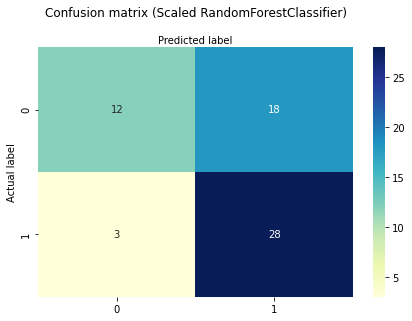

In [19]:
plot_cnf_matrix(cnf_matrix_rfc, 'Scaled RandomForestClassifier')

#### Interpretation of the map

- 1 x 1: True positives = 28
- 1 x 0: False Negative = 8
- 0 x 1: False Positve = 3
- 0 x 0: True Negative = 22

#### ROC Curve (unscaled)

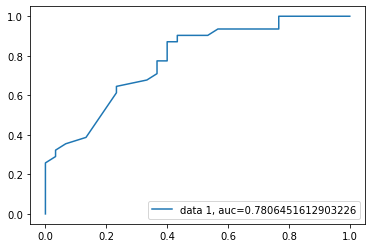

In [20]:
plot_roc_curve(rclassifier2, x_test, y_test)

#### ROC Curve (scaled)

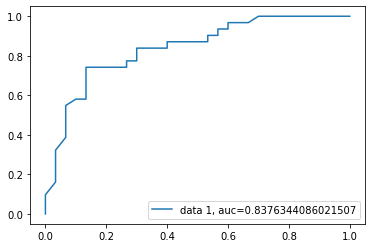

In [21]:
plot_roc_curve(rclassifier1, x_test, y_test)

## Logistic Regression

In [22]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

pipe.score(x_test, y_test) 

0.7704918032786885

In [23]:
y_pred_lreg = pipe.predict(x_test)

print('The accuracy score for Logistic Regression scaled is', accuracy_score(y_test, y_pred_lreg))

The accuracy score for Logistic Regression scaled is 0.7704918032786885


#### Logistic Regression -> Postprocessing

In [24]:
cnf_matrix_lreg = metrics.confusion_matrix(y_test, y_pred_lreg)
cnf_matrix_lreg

array([[19, 11],
       [ 3, 28]], dtype=int64)

### Logistic Regression -> Data visulization

In [25]:
cnf_evaluation(y_test, y_pred_lreg)

Accuracy: 0.7704918032786885
Precision: 0.717948717948718
Recall: 0.9032258064516129


Confusion matrix heat map

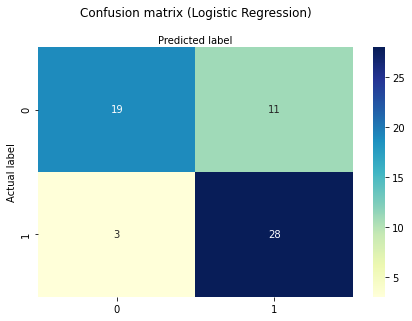

In [26]:
plot_cnf_matrix(cnf_matrix_lreg, 'Logistic Regression')

#### Interpretation of the map

- 1 x 1: True positives = 28
- 1 x 0: False Negative = 19
- 0 x 1: False Positve = 3
- 0 x 0: True Negative = 11

#### ROC Curve

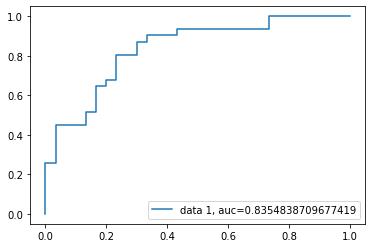

In [27]:
plot_roc_curve(pipe, x_test, y_test)

## SDGClassifier

In [28]:
pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(x_train, y_train)

pipe.score(x_test, y_test) 
y_pred_sdg = pipe.predict(x_test)

print('The accuracy score for Logistic Regression scaled is', accuracy_score(y_test, y_pred_sdg))

The accuracy score for Logistic Regression scaled is 0.7704918032786885


In [29]:
cnf_evaluation(y_test, y_pred_sdg)

Accuracy: 0.7704918032786885
Precision: 0.7428571428571429
Recall: 0.8387096774193549


In [30]:
cnf_matrix_sdg = metrics.confusion_matrix(y_test, y_pred_sdg)
cnf_matrix_sdg

array([[21,  9],
       [ 5, 26]], dtype=int64)

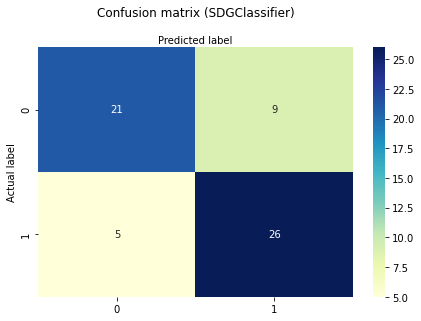

In [31]:
plot_cnf_matrix(cnf_matrix_sdg, 'SDGClassifier')

#### Interpretation of the map

- 1 x 1: True positives = 24
- 1 x 0: False Negative = 16
- 0 x 1: False Positve = 7
- 0 x 0: True Negative = 14

#### ROC Curve

In [32]:
# plot_roc_curve(pipe, x_test, y_test, True)

In [33]:
#saving model and loading into the disk space
file_name = "heart_sdg_calssifier.pkl"

with open(file_name, 'wb') as file:
    pickle.dump(pipe, file)